<img src = 'https://upload.wikimedia.org/wikipedia/commons/2/26/World_Health_Organization_Logo.svg'
    width = 690px
    height= 665px />

# **WHO Life Expectancy  —  Exploratory Data Analysis**

by: Team 1 - Scrum

***

## **The Data**

|Column|Description|
|---:|:---|
|Country|Country|
|Region|Region|
|Year|Year|
|Infant_deaths|Number of Infant Deaths per 1000 population|
|Under_five_deaths|Number of under-five deaths per 1000 population|
|Adult_mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|Alcohol_consumption|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|Incidents_HIV|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP_per_capita|Gross Domestic Product per capita (in USD)|
|Population_mln|Population of the country|
|Thinness_ten_nineteen_years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|Thinness_five_nine_years|Prevalence of thinness among children for Age 5 to 9(%)|
|Schooling|Number of years of Schooling(years)|
|Economy_status_Developed|Developed status|
|Economy_status_Developing|Developing status|
|Life expectancy|Life Expectancy in age|

## **The Scope**

This notebook explores the Life Expectancy Data from the World Health Organization.\
We begin with quality checks to identify missing and redundant data, followed by an exploratory data analysis to examine correlations between life expectancy and other features.\
The insights gained will guide the model-building process, focusing on two linear models aimed at accurately predicting life expectancy.\
One model will use the least information necessary to make a prediction (refer to `WHO - Sensitive Linear Model.ipynb`), whilst the other model will be a more elaborate one which will include sensitive data (refer to `WHO - Non-sensitive Linear Model.ipynb`).

## **Key Questions Answered**

* Which features are strongly\weakly positively correlated to life expectancy?
* Which features are strongly\weakly negatively correlated to life expectancy?
* Which features are highly correlated with each other?
* What transformation could we apply to the data to improve correlations with life expectancy?
* What are the key takeaways moving forward to the feature engineering phase?

***

### 1. Dataset Import

In [124]:
# Importing required modules

import pandas as pd    # for general data use & data analysis
import matplotlib.pyplot as plt    # for data visualisation
import seaborn as sns    # for data visualisation
import numpy as np       # for maths

The DataFrame `df` is created by reading the `Life Expectancy Data.csv` file from a local folder.

In [126]:
df = pd.read_csv('Life Expectancy Data.csv')

In [127]:
# Checking out first 5 rows of data
pd.set_option('display.max_columns', None)
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Checking out the datatypes we find that there are only 2 columns with `object` datatype: `Country` and `Region`. The rest of the columns are either `int64` or `float64`.

In [129]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

Inspecting the dataset we can observe that there is a total of `2864` observations and `21` columns. 

In [131]:
df.shape

(2864, 21)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

### 2. Data Quality Checks

Even though it appears that there are no null values, let's check if there are any missing values that have been replaced with any symbols or digits. This could have potentially happened in columns with `object` data type.\
As for columns with `float64` or `int64` data type, missing values could haven been replaced with the digit 0. Let's cross-check every column.

In [135]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

Checking the unique values of the `Country` column, we can confirm that there are no missing values that have been replaced with any symbols or digits. There are `179` countries listed in the column.

In [137]:
df['Country'].unique()

array(['Turkiye', 'Spain', 'India', 'Guyana', 'Israel', 'Costa Rica',
       'Russian Federation', 'Hungary', 'Jordan', 'Moldova', 'Brazil',
       'Malta', 'Bahamas, The', 'Ukraine', 'Switzerland', 'Norway',
       'Finland', 'Comoros', 'Japan', 'Gabon', 'Ghana', 'Philippines',
       'Congo, Rep.', 'Madagascar', 'Estonia', 'Belize', 'Kazakhstan',
       'Cameroon', 'Zimbabwe', 'Bhutan', 'South Africa', 'Eritrea',
       'Germany', 'Saudi Arabia', 'Kiribati', 'Seychelles', 'Singapore',
       'Togo', 'Denmark', 'Gambia, The', 'Sweden', 'Austria',
       'Kyrgyz Republic', 'Grenada', 'Brunei Darussalam', 'Greece',
       'Uruguay', 'Croatia', 'Romania', 'Central African Republic',
       'Algeria', 'Yemen, Rep.', 'Armenia',
       'St. Vincent and the Grenadines', 'Kenya', 'Micronesia, Fed. Sts.',
       'Antigua and Barbuda', 'Nepal', 'Lithuania', 'Vanuatu',
       'Afghanistan', 'Kuwait', 'Argentina', 'Panama', 'Oman', 'France',
       'Bosnia and Herzegovina', 'Mauritania', 'Somalia

In [138]:
len(df['Country'].unique())

179

Checking the unique values of the `Region` column, we can confirm that there are no missing values that have been replaced with any symbols or digits. There are `9` regions listed in the column.

In [140]:
df['Region'].unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [141]:
len(df['Region'].unique())

9

Checking the unique values of the `Year` column, we can confirm that there are no missing values that have been replaced with any symbols or digits. The data is between the years `2000` and `2015`.

In [143]:
df['Year'].unique()

array([2015, 2007, 2006, 2012, 2000, 2001, 2008, 2011, 2002, 2013, 2005,
       2003, 2004, 2009, 2010, 2014], dtype=int64)

In the `Infant_deaths` column, no missing values seem to have been replaced with the digit 0. The values range from `1.8` to `138.1`.

In [145]:
print(df['Infant_deaths'].min())
print(df['Infant_deaths'].max())

1.8
138.1


In the `Under_five_deaths` column, no missing values seem to have been replaced with the digit 0. The values range from `2.3`. to `224.9`.

In [147]:
print(df['Under_five_deaths'].min())
print(df['Under_five_deaths'].max())

2.3
224.9


In the `Adult_mortality`, no missing values seem to have been replaced with the digit 0. The values range from `49.4` to `719.4`.

In [149]:
print(round(df['Adult_mortality'].min(),1))
print(round(df['Adult_mortality'].max(),1))

49.4
719.4


In the `Alcohol_consumption` column, no missing values seem to have been replaced with the digit 0.\
There are `38` observations with `0` value but this makes sense as these are muslim countries and they don't consume alcohol.\
Values range from `0` to `17.9`.

In [151]:
print(round(df['Alcohol_consumption'].min(),1))
print(round(df['Alcohol_consumption'].max(),1))

0.0
17.9


In [152]:
df[df['Alcohol_consumption'] == 0].head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
36,Saudi Arabia,Middle East,2014,8.3,9.6,89.1200,0.0,98,98,28.3,98,98,0.13,20328,30.92,7.7,7.5,9.5,0,1,74.5
69,Kuwait,Middle East,2011,8.5,10.0,64.9690,0.0,99,99,29.1,99,99,0.13,33167,3.17,3.3,3.2,7.0,0,1,74.6
78,Somalia,Africa,2008,101.1,166.5,331.4010,0.0,42,64,22.7,40,31,0.13,265,11.40,7.2,7.0,2.1,0,1,53.3
310,Somalia,Africa,2000,104.4,172.7,355.9290,0.0,42,64,22.1,37,33,0.13,174,8.87,8.0,7.9,2.1,0,1,50.9
327,Bangladesh,Asia,2011,37.2,46.7,139.3125,0.0,96,71,21.2,96,96,0.01,1024,149.27,18.7,19.2,5.1,0,1,70.3


In [153]:
df['Alcohol_consumption'][df['Alcohol_consumption'] == 0].count()

38

In the `Hepatitis_B` column, no missing values seem to have been replaced with the digit 0. The values range from `12` to `99`.

In [155]:
print(round(df['Hepatitis_B'].min(),1))
print(round(df['Hepatitis_B'].max(),1))

12
99


In the `Measles` column, no missing values seem to have been replaced with the digit 0. The values range from `10` to `99`.

In [157]:
print(round(df['Measles'].min(),1))
print(round(df['Measles'].max(),1))

10
99


In the `BMI` column, no missing values seem to have been replaced with the digit 0. The values range from `19.8` to `32.1`.

In [159]:
print(round(df['BMI'].min(),1))
print(round(df['BMI'].max(),1))

19.8
32.1


In the `Polio` column, no missing values seem to have been replaced with the digit 0. The values range from `8` to `99`.

In [161]:
print(round(df['Polio'].min(),1))
print(round(df['Polio'].max(),1))

8
99


In the `Diphtheria` column, no missing values seem to have been replaced with the digit 0. The values range from `16` to `99`.

In [163]:
print(round(df['Diphtheria'].min(),1))
print(round(df['Diphtheria'].max(),1))

16
99


In the `Incidents_HIV` column, no missing values seem to have been replaced with the digit 0. The values range from `0.01` to `21.68`.

In [165]:
print(round(df['Incidents_HIV'].min(),3))
print(round(df['Incidents_HIV'].max(),3))

0.01
21.68


In the `GDP_per_capita` column, no missing values seem to have been replaced with the digit 0. The values range from `148` to `112418`.

In [167]:
print(round(df['GDP_per_capita'].min(),1))
print(round(df['GDP_per_capita'].max(),1))

148
112418


In the `Population_mln` column, no missing values seem to have been replaced with the digit 0. The values range from `0.1` to `1379.9`.

In [169]:
print(round(df['Population_mln'].min(),1))
print(round(df['Population_mln'].max(),1))

0.1
1379.9


In the `Thinness_ten_nineteen_years` column, no missing values seem to have been replaced with the digit 0. The values range from `0.1` to `27.7`.

In [171]:
print(round(df['Thinness_ten_nineteen_years'].min(),1))
print(round(df['Thinness_ten_nineteen_years'].max(),1))

0.1
27.7


In the `Thinness_five_nine_years` column, no missing values seem to have been replaced with the digit 0. The values range from `0.1` to `28.6`.

In [173]:
print(round(df['Thinness_five_nine_years'].min(),1))
print(round(df['Thinness_five_nine_years'].max(),1))

0.1
28.6


In the `Schooling` column, no missing values seem to have been replaced with the digit 0. The values range from `1.1` to `14.1`.

In [175]:
print(round(df['Schooling'].min(),1))
print(round(df['Schooling'].max(),1))

1.1
14.1


In the `Economy_status_Developed` column there are no missing values. The values are either `0`, indicating that the country is developed, or `1`, indicating that the country is not developed.

In [177]:
count = df['Economy_status_Developed'].count()
count.sum()

2864

In [178]:
df['Economy_status_Developed'].value_counts()

Economy_status_Developed
0    2272
1     592
Name: count, dtype: int64

In the `Economy_status_Developing` column there are no missing values. The values are either `0`, indicating that the country is developing, or `1`, indicating that the country is not developing.

In [180]:
count = df['Economy_status_Developing'].count()
count.sum()

2864

In [181]:
df['Economy_status_Developing'].value_counts()

Economy_status_Developing
1    2272
0     592
Name: count, dtype: int64

In the `Life_expectancy` column, no missing values seem to have been replaced with the digit 0. The values range from `39.4` to `83.8`.

In [183]:
print(round(df['Life_expectancy'].min(),1))
print(round(df['Life_expectancy'].max(),1))

39.4
83.8


Lastly, we check for duplicates and there are `0` duplicated values.

In [185]:
duplicate_rows = df[df.duplicated()]  # .duplicated() method returns duplicated rows
duplicate_rows.count().sum()

0

Furthermore, upon exploring in detail the columns `Economy_status_Developed` and `Economy_status_Developing` we can observe that there are no observation where the `Economy_status_Developed` is `0` and `Economy_status_Developing` is `0`.\
This means that whichever country not marked as "developed" in the `Economy_status_Developed` column, is marked as "developing" in the `Economy_status_Developing` column. We could potentially prescind from one of these columns as they are redundant. 

In [187]:
# Checking the count of observations where 'Economy_status_Developed' is 0 and 'Economy_status_Developing' is 0.
df[(df['Economy_status_Developed'] == 0) & (df['Economy_status_Developing'] == 0)].count()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [188]:
# Checking the count of observations where 'Economy_status_Developed' is 0 and 'Economy_status_Developing' is 1.
df[(df['Economy_status_Developed'] == 0) & (df['Economy_status_Developing'] == 1)].count()

Country                        2272
Region                         2272
Year                           2272
Infant_deaths                  2272
Under_five_deaths              2272
Adult_mortality                2272
Alcohol_consumption            2272
Hepatitis_B                    2272
Measles                        2272
BMI                            2272
Polio                          2272
Diphtheria                     2272
Incidents_HIV                  2272
GDP_per_capita                 2272
Population_mln                 2272
Thinness_ten_nineteen_years    2272
Thinness_five_nine_years       2272
Schooling                      2272
Economy_status_Developed       2272
Economy_status_Developing      2272
Life_expectancy                2272
dtype: int64

In [189]:
# Checking the count of observations where 'Economy_status_Developed' is 1 and 'Economy_status_Developing' is 0.
df[(df['Economy_status_Developed'] == 1) & (df['Economy_status_Developing'] == 0)].count()

Country                        592
Region                         592
Year                           592
Infant_deaths                  592
Under_five_deaths              592
Adult_mortality                592
Alcohol_consumption            592
Hepatitis_B                    592
Measles                        592
BMI                            592
Polio                          592
Diphtheria                     592
Incidents_HIV                  592
GDP_per_capita                 592
Population_mln                 592
Thinness_ten_nineteen_years    592
Thinness_five_nine_years       592
Schooling                      592
Economy_status_Developed       592
Economy_status_Developing      592
Life_expectancy                592
dtype: int64

In [190]:
# Checking that the values sum up to 2864 (the length of the dataset)
df['Country'][(df['Economy_status_Developed'] == 0) & (df['Economy_status_Developing'] == 1)].count() + \
df['Country'][(df['Economy_status_Developed'] == 1) & (df['Economy_status_Developing'] == 0)].count()  

2864

Let's now dive into the Exploratory Data Analysis.

### 3. Exploratory Data Analysis

#### 3.2 Summary Statistics

Upon reviewing the summary statistics, we can observe that in most of the columns the mean and median values are extremely low compared to the maximum values. These maximum values are clearly outliers.

The column with the most extreme case are:
* `Population_mln` with a maximum value of `1379`, over 38 times the mean value.
* `GDP_per_capita` with a maximum value of `112418`, over 9 times the mean value.

On the other hand, columns with realtively close mean, median and maximum values are: `Hepatitis_B`, `Polio`, `Diphtheria`.

In relation to the `Life_expectancy` column, a key insight stands out:
* In the 179 countries in this dataset, the average life expectancy is `68` years, which is over 1.7 times larger than the minimum age, and over 1.2 times lower than the maximum age.

In [195]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [196]:
# checking summary statistics for columns with 'object' datatype
df.describe(include='object')

,Country,Region
count,2864,2864
unique,179,9
top,Turkiye,Africa
freq,16,816


Let's visualise which is the country with the maximum value in the `Population_mln` column.

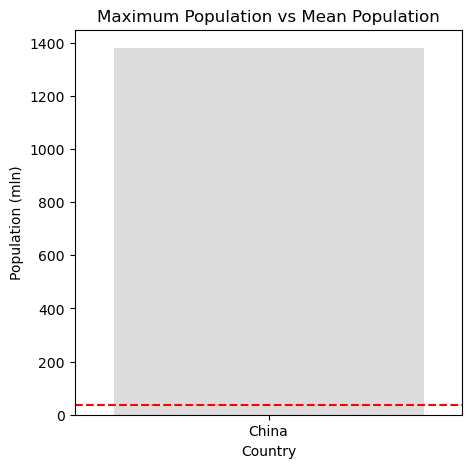

In [198]:
# Setting the figure size
plt.figure(figsize=(5,5)) 

# Calculate mean
mean_population = df['Population_mln'].mean()

# Calculate the maximum value
max_pop = df['Population_mln'].max()

# Filter for the country with the maximum value
country_max_pop = df[df['Population_mln'] == max_pop]

# Plot barplot 
sns.barplot(x='Country', y='Population_mln', data=country_max_pop, palette='coolwarm', hue='Country')

# Plot horizontal line at the mean population
plt.axhline(mean_population, color='red', linestyle='--')

# Label
plt.ylabel("Population (mln)")
plt.title("Maximum Population vs Mean Population")

# Show plot
plt.show()

Let's visualise which is the country with the maximum value in the `GDP_per_capita` column.

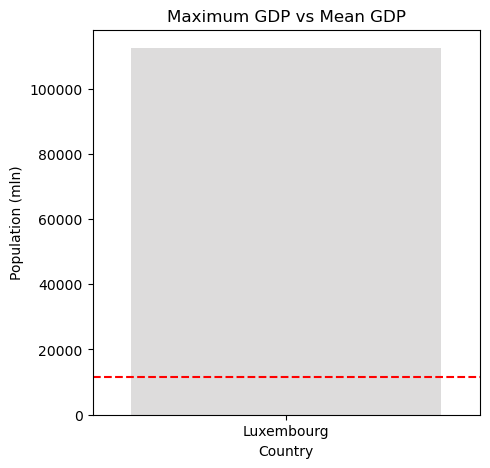

In [200]:
# Setting the figure size
plt.figure(figsize=(5,5)) 

# Calculate mean
mean_gdp = df['GDP_per_capita'].mean()

# Calculate the maximum value
max_gdp = df['GDP_per_capita'].max()

# Filter for the country with the maximum value
country_max_gdp = df[df['GDP_per_capita'] == max_gdp]

# Plot barplot 
sns.barplot(x='Country', y='GDP_per_capita', data=country_max_gdp, palette='coolwarm', hue='Country')

# Plot horizontal line at the mean population
plt.axhline(mean_gdp, color='red', linestyle='--')

# Label
plt.ylabel("Population (mln)")
plt.title("Maximum GDP vs Mean GDP")

# Show plot
plt.show()

Let's visualise the maximum values of `Hepatitis_B`, `Polio`, `Diphtheria` in relation to each mean.

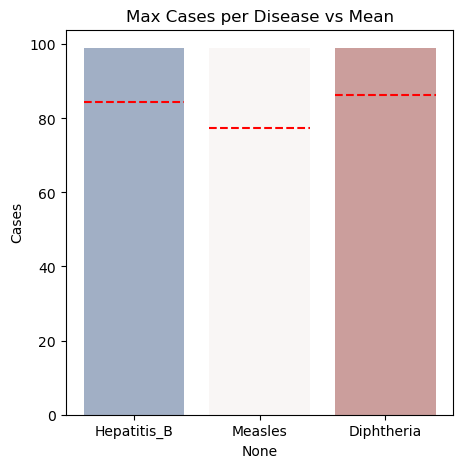

In [202]:
# Setting the figure size
plt.figure(figsize=(5,5)) 

# Get max values
max_values = df[['Hepatitis_B', 'Measles', 'Diphtheria']].max()

# Get mean values
mean_values = df[['Hepatitis_B', 'Measles', 'Diphtheria']].mean()

# Create barplot
sns.barplot(x=max_values.index, y=max_values.values, palette='vlag', hue=max_values.index)

# Add horizontal lines for each mean
plt.hlines(mean_values['Hepatitis_B'], xmin=-0.4, xmax=0.4, colors='red', linestyles='--') # xmin and xmax set the length of the mean line to span only within the 'Hepatitis_B' bar
plt.hlines(mean_values['Measles'], xmin=0.6, xmax=1.4, colors='red', linestyles='--')
plt.hlines(mean_values['Diphtheria'], xmin=1.6, xmax=2.4, colors='red', linestyles='--')

# Labels
plt.ylabel("Cases")
plt.title("Max Cases per Disease vs Mean")
plt.show()

Let's visualise which is the country with the maximum value in the `Life_expectancy` column.

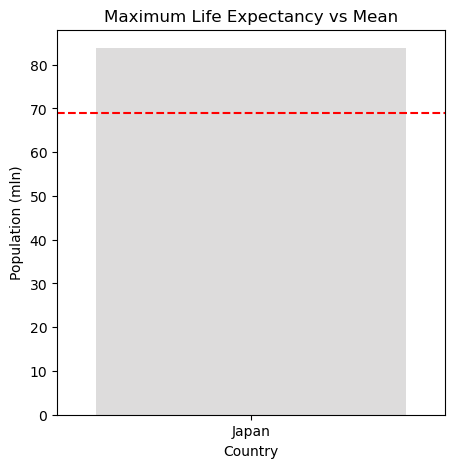

In [204]:
# Setting the figure size
plt.figure(figsize=(5,5)) 

# Calculate mean
mean_life_expectancy = df['Life_expectancy'].mean()

# Calculate the maximum value
max_life_expectancy = df['Life_expectancy'].max()

# Filter for the country with the maximum value
country_max_life_expectancy = df[df['Life_expectancy'] == max_life_expectancy]

# Plot barplot 
sns.barplot(x='Country', y='Life_expectancy', data=country_max_life_expectancy, palette='coolwarm', hue='Country')

# Plot horizontal line at the mean population
plt.axhline(mean_life_expectancy, color='red', linestyle='--')

# Label
plt.ylabel("Population (mln)")
plt.title("Maximum Life Expectancy vs Mean")

# Show plot
plt.show()

Let's figure out the patterns present in the data. 

#### 3.2 Data Patterns

Visualising the correlation heatmap, a few key insights stand out:

* Features strongly positively correlated with `Life_expectancy` (with a value larger than 0.5) are: `Schooling`, `GDP_per_capita`, `Diphtheria`, `Polio`, `BMI` and `Measles`.
* Features weakly positively correlated with `Life_expectancy` are: `Year`, `Population_mln`, `Alcohol_consumption`, `Hepatitis_B` and `Economy_status_Developed`.
* Features strongly negatively correlated with `Life_expectancy` are: `Infant_deaths`, `Under_five_deaths` and `Adult_mortality`.
* Features weakly negatively correlated with `Life_expectancy` are: `Incidents_HIV`, `Thinness_ten_nineteen_years`, `Thinness_five_nine_years` and `Economy_status_Developing`.
  
* Features positively correlated with each other (with a value equal or larger than 0.7) are:
    -  `Under_five_deaths`, `Infant_deaths` and `Adult_mortality`
    -  `Adult_mortality` and `Incidents_HIV`
    -  `Polio`, `Diphtheria` and `Hepatitis_B`
    -  `Thinness_five_nine_years` and `Thinness_ten_nineteen_years`

In [208]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

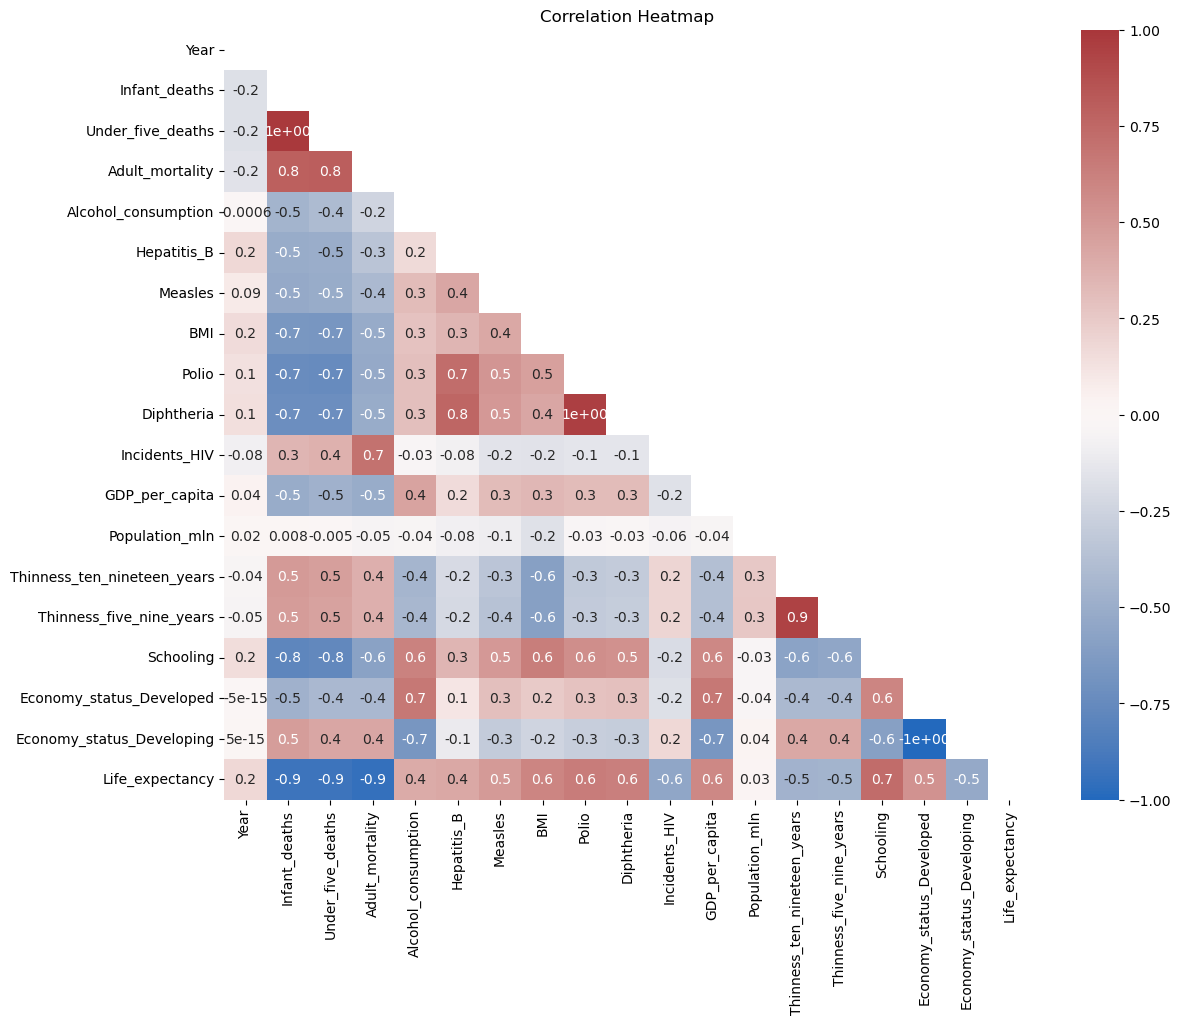

In [209]:
# Correlation Heatmap

plt.figure(figsize=(13,10))  # Setting the figure size

sns.heatmap(df.corr(numeric_only=True), # passing the correlation matrix with numeric values only
            annot=True,  # to show the correlation value
            vmin=-1, vmax=1, # setting the min and max values in the scale
            fmt='.1', # setting the amount of decimals shown in the correlation value
            cmap='vlag',  # setting the colour map
            mask=np.triu(df.corr(numeric_only=True))) # creating a mask to show only 1 half of the correlation matrix (instead of having the values mirrored)

plt.title('Correlation Heatmap')

plt.show()

##### 3.2.1 Positively Correlated Features

Now let's visualise `Life_expectancy` against the columns that we have identified to be largely positively correlated: `Schooling`, `GDP_per_capita`, `Diphtheria`, `Polio`, `BMI`, `Measles` and `Economy_status_Developed`.\
In some of the plots we can clearly observe that as one variable increases, so does the other, but these don't necessarily have a linear relationship. Some of them seem to have a logarithmic or exponential relationship.

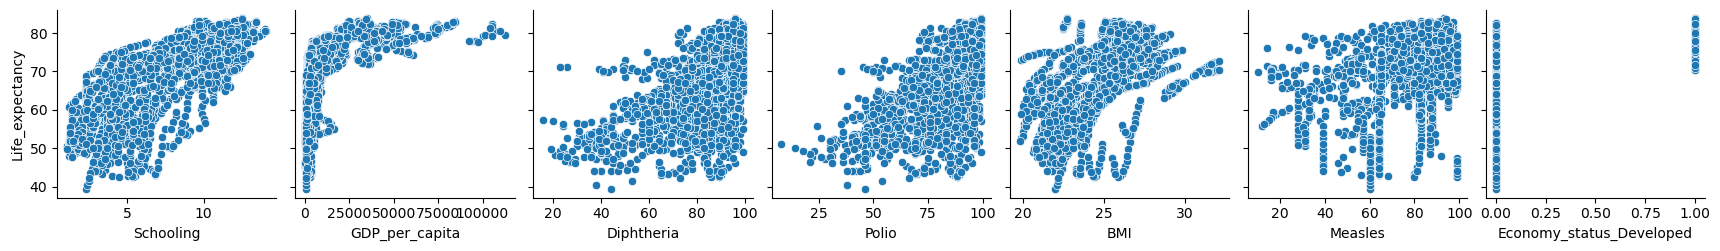

In [212]:
sns.pairplot(data=df, y_vars=['Life_expectancy'], x_vars=['Schooling','GDP_per_capita','Diphtheria', 'Polio', 'BMI', 'Measles', 'Economy_status_Developed'])
plt.show()

Let's create new columns in our data with the logarithmic transformations to see how `Life_expectancy` behaves against them.

In [214]:
# Create a copy of the dataframe
df_test = df.copy()

# Create new columns with numpy's logarithmic function
df_test['Schooling_log'] =  np.log(df_test['Schooling']) 
df_test['GDP_per_capita_log'] =  np.log(df_test['GDP_per_capita']) 
df_test['Diphtheria_log'] =  np.log(df_test['Diphtheria']) 
df_test['Polio_log'] =  np.log(df_test['Polio']) 
df_test['BMI_log'] =  np.log(df_test['BMI']) 
df_test['Measles_log'] =  np.log(df_test['Measles']) 

# drop columns and retain only the transformed ones
df_test.drop(columns=['Schooling', 'GDP_per_capita', 'Diphtheria','Polio', 'BMI', 'Measles'], inplace=True)

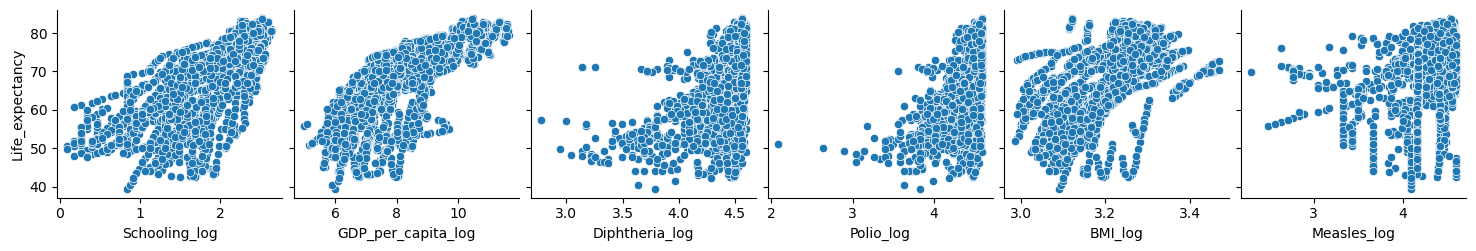

In [215]:
sns.pairplot(data=df_test, y_vars=['Life_expectancy'], x_vars=['Schooling_log','GDP_per_capita_log','Diphtheria_log', 'Polio_log', 'BMI_log', 'Measles_log'])
plt.show()

After performing these transformations and visualising the correlation heatmap we observe that:
* `Life_expectancy` and `Schooling_log` are positively correlated, with a value of `0.7`. The transformation didn't bring any changes in terms of correlation.
* `Life_expectancy` and `GDP_per_capita_log` are positively correlated, with a value of `0.8`, which is larger by 0.2 than the correlation between `Life_Expectancy` and `GDP_per_capita`.  This represents an improvement.
* `Life_expectancy` and `Diphtheria_log`, `Polio_log` and `BMI_log` are positively correlated, with a value of `0.6`. The transformation didn't bring any changes in terms of correlation.
* `Life_expectancy` and `Measles_log` are positively correlated, with a value of `0.4`, which is lower by 0.1 than the correlation between `Life_Expectancy` and `Measles`.  This doesn't represent an improvement.

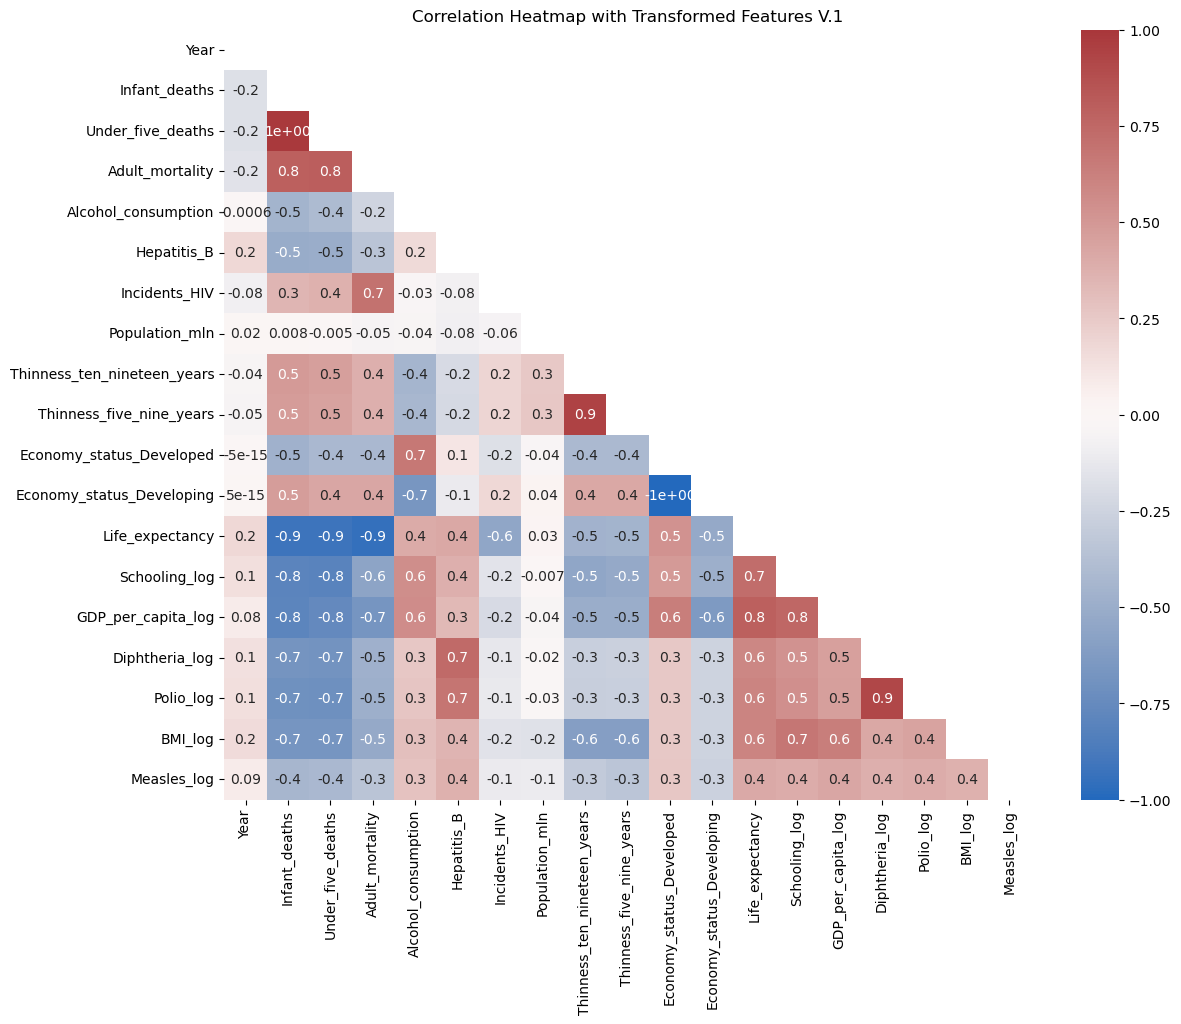

In [217]:
# Correlation Heatmap

plt.figure(figsize=(13,10))  # Setting the figure size

sns.heatmap(df_test.corr(numeric_only=True), # passing the correlation matrix with numeric values only
            annot=True,  # to show the correlation value
            vmin=-1, vmax=1, # setting the min and max values in the scale
            fmt='.1', # setting the amount of decimals shown in the correlation value
            cmap='vlag',  # setting the colour map
            mask=np.triu(df_test.corr(numeric_only=True))) # creating a mask to show only 1 half of the correlation matrix (instead of having the values mirrored)

plt.title('Correlation Heatmap with Transformed Features V.1')

plt.show()

Could we perhaps improve the correlation between `Life_expectancy` and the weakly positively correlated features such as `Alcohol_consumption` and `Hepatitis_B`?\
Let's visualise their relationship.

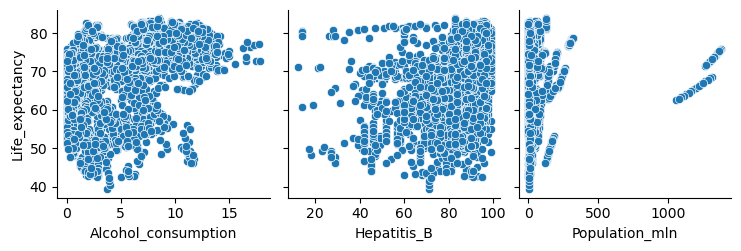

In [219]:
sns.pairplot(data=df, y_vars=['Life_expectancy'], x_vars=['Alcohol_consumption', 'Hepatitis_B', 'Population_mln'])
plt.show()

Let's create new columns in our data with the logarithmic transformations to see how `Life_expectancy` behaves against them.

In [221]:
# Create new columns with numpy's logarithmic function
df_test['Alcohol_consumption_log'] =  np.log1p(df_test['Alcohol_consumption'])  # log(1 + x) to avoid log(0)
df_test['Hepatitis_B_log'] =  np.log1p(df_test['Hepatitis_B']) # log(1 + x) to avoid log(0)
df_test['Population_log'] = np.log1p(df_test['Population_mln'])  # log(1 + x) to avoid log(0)

# drop columns and retain only the transformed ones
df_test.drop(columns=['Alcohol_consumption','Hepatitis_B','Population_mln'], inplace=True)

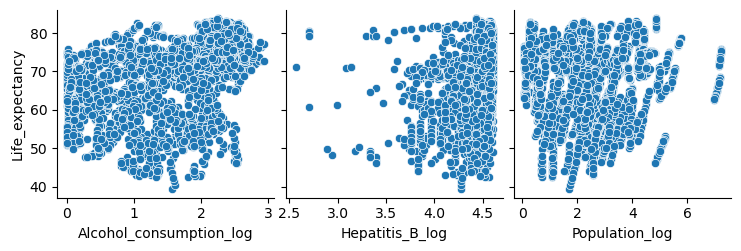

In [222]:
sns.pairplot(data=df_test, y_vars=['Life_expectancy'], x_vars=['Alcohol_consumption_log', 'Hepatitis_B_log', 'Population_log'])
plt.show()

After performing these transformations and visualising the correlation heatmap we observe that:
* `Life_expectancy` and `Alcohol_consumption_log` are weakly positively correlated, with a value of `0.3`, which is lower by 0.1 than the correlation between `Life_Expectancy` and `Alcohol_consumption`. This doesn't represent an improvement.
* `Life_expectancy` and `Hepatitis_B_log` are weakly positively correlated, with a value of `0.4`. The transformation didn't bring any changes in terms of correlation.
* `Life_expectancy` and `Population_log` are weakly negatively correlated, with a value of `-0.01`. The transformation represent changes in terms of correlation as before transforming the feature the correlation was positive.

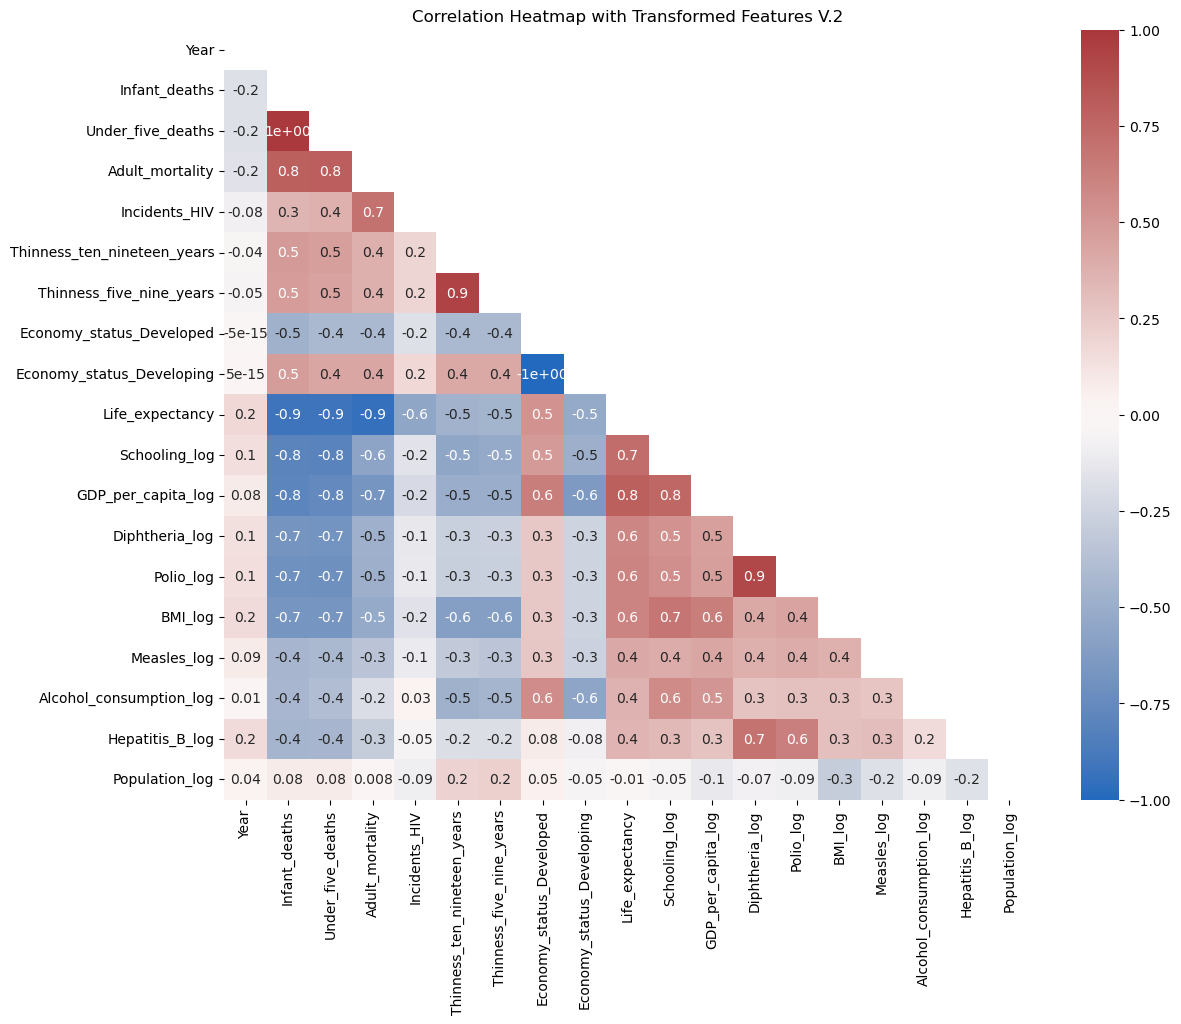

In [224]:
# Correlation Heatmap

plt.figure(figsize=(13,10))  # Setting the figure size

sns.heatmap(df_test.corr(numeric_only=True), # passing the correlation matrix with numeric values only
            annot=True,  # to show the correlation value
            vmin=-1, vmax=1, # setting the min and max values in the scale
            fmt='.1', # setting the amount of decimals shown in the correlation value
            cmap='vlag',  # setting the colour map
            mask=np.triu(df_test.corr(numeric_only=True))) # creating a mask to show only 1 half of the correlation matrix (instead of having the values mirrored)

plt.title('Correlation Heatmap with Transformed Features V.2')

plt.show()

##### 3.2.2 Negatively Correlated Features

The correlation between `Life_expectancy` and `Infant_deaths`, `Under_five_deaths` and `Adult_mortality` is `0.9`, which is surprisingly high.\
Could we perhaps improve the correlation between `Life_expectancy` and the weakly negatively correlated features such as `Incidents_HIV`, `Thinness_ten_nineteen_years` and `Thinness_five_nine_years`?\
Let's visualise their relationship.

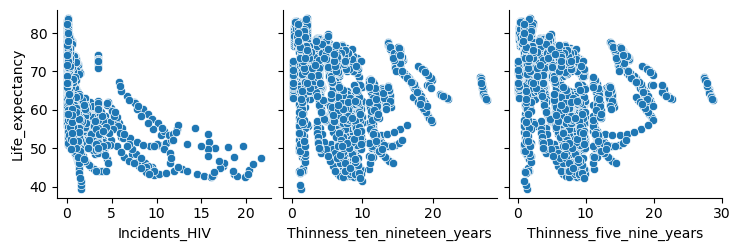

In [227]:
sns.pairplot(data=df, y_vars=['Life_expectancy'], x_vars=['Incidents_HIV','Thinness_ten_nineteen_years','Thinness_five_nine_years'])
plt.show()

Let's create new columns in our data with the logarithmic transformations to see how `Life_expectancy` behaves against them.

In [229]:
# Create new columns with numpy's logarithmic function
df_test['Incidents_HIV_log'] =  np.log(df_test['Incidents_HIV']) 
df_test['Thinness_ten_nineteen_years_log'] =  np.log(df_test['Thinness_ten_nineteen_years']) 
df_test['Thinness_five_nine_years_log'] =  np.log(df_test['Thinness_five_nine_years']) 

# drop columns and retain only the transformed ones
df_test.drop(columns=['Incidents_HIV','Thinness_ten_nineteen_years', 'Thinness_five_nine_years'], inplace=True)

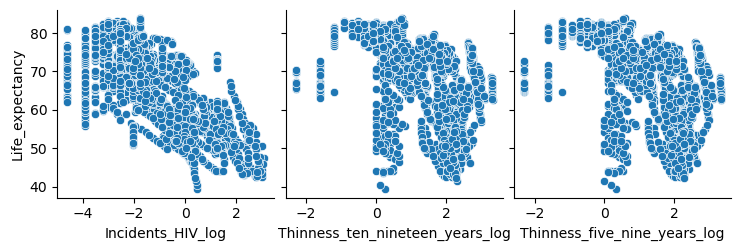

In [230]:
sns.pairplot(data=df_test, y_vars=['Life_expectancy'], x_vars=['Incidents_HIV_log','Thinness_ten_nineteen_years_log','Thinness_five_nine_years_log'])
plt.show()

After performing these transformations and visualising the correlation heatmap we observe that:
* `Life_expectancy` and `Incidents_HIV_log` are negatively correlated, with a value of `- 0.7`, which is lower by 0.1 than the correlation between `Life_expectancy` and `Incidents_HIV`. This represents an improvement.
* `Life_expectancy` and `Thinness_ten_nineteen_years_log` are negatively correlated, with a value of `- 0.5`. The transformation didn't bring any changes in terms of correlation.
* `Life_expectancy` and `Thinness_five_nine_years_log` are negatively correlated, with a value of `- 0.5`. The transformation didn't bring any changes in terms of correlation.

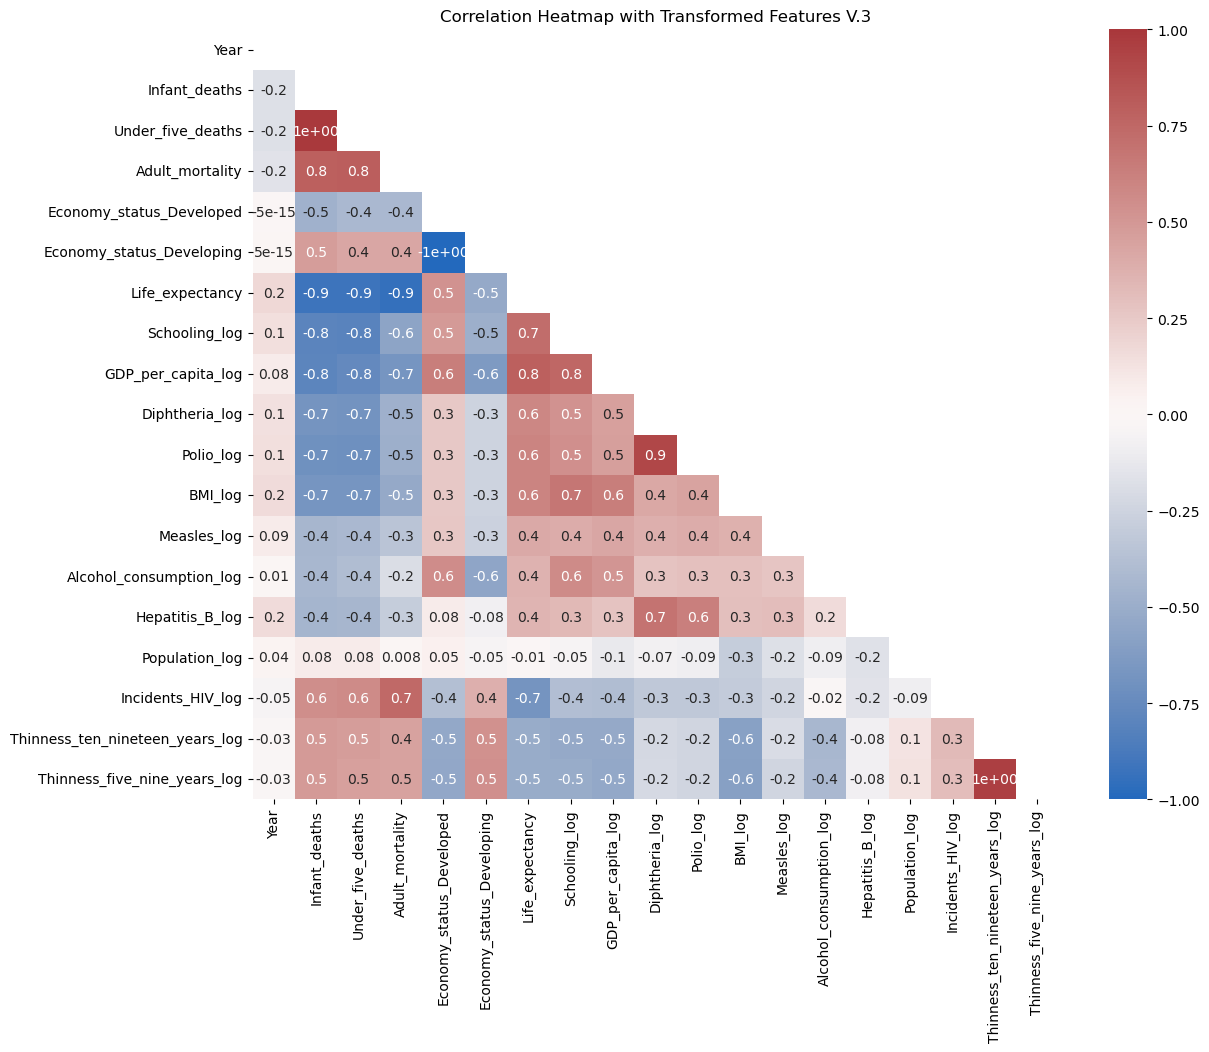

In [232]:
# Correlation Heatmap

plt.figure(figsize=(13,10))  # Setting the figure size

sns.heatmap(df_test.corr(numeric_only=True), # passing the correlation matrix with numeric values only
            annot=True,  # to show the correlation value
            vmin=-1, vmax=1, # setting the min and max values in the scale
            fmt='.1', # setting the amount of decimals shown in the correlation value
            cmap='vlag',  # setting the colour map
            mask=np.triu(df_test.corr(numeric_only=True))) # creating a mask to show only 1 half of the correlation matrix (instead of having the values mirrored)

plt.title('Correlation Heatmap with Transformed Features V.3')

plt.show()

##### 3.2.3 Correlations with Regions

Let's one-hot encode the `Region` column and check out the correlations with `Life_expectancy`.

In [235]:
df_ohe = df[['Region', 'Life_expectancy']].copy()  # Create a copy of the DataFrame with only 'Region' and 'Life_expectancy' columns
df_ohe = pd.get_dummies(df_ohe, columns=['Region'], drop_first=True, prefix='Region',dtype=int)  # One-hot encode 'Region' column
df_ohe.head()  # visualise the first few rows

,Life_expectancy,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,76.5,0,0,0,1,0,0,0,0
1,82.8,0,0,1,0,0,0,0,0
2,65.4,1,0,0,0,0,0,0,0
3,67.0,0,0,0,0,0,0,0,1
4,81.7,0,0,0,1,0,0,0,0


In the correlation heatmap we can observe that regions such as `Region_European Union` are strongly positively correlated to `Life_expectancy`.\
On the other hand, regions like `Region_Oceania` and `Region_Asia` have the weakest positive correlation to `Life_expectancy`.\
This suggests that better healthcare and socioecomic conditions such as in the European Union contribute to higher life expectancy.

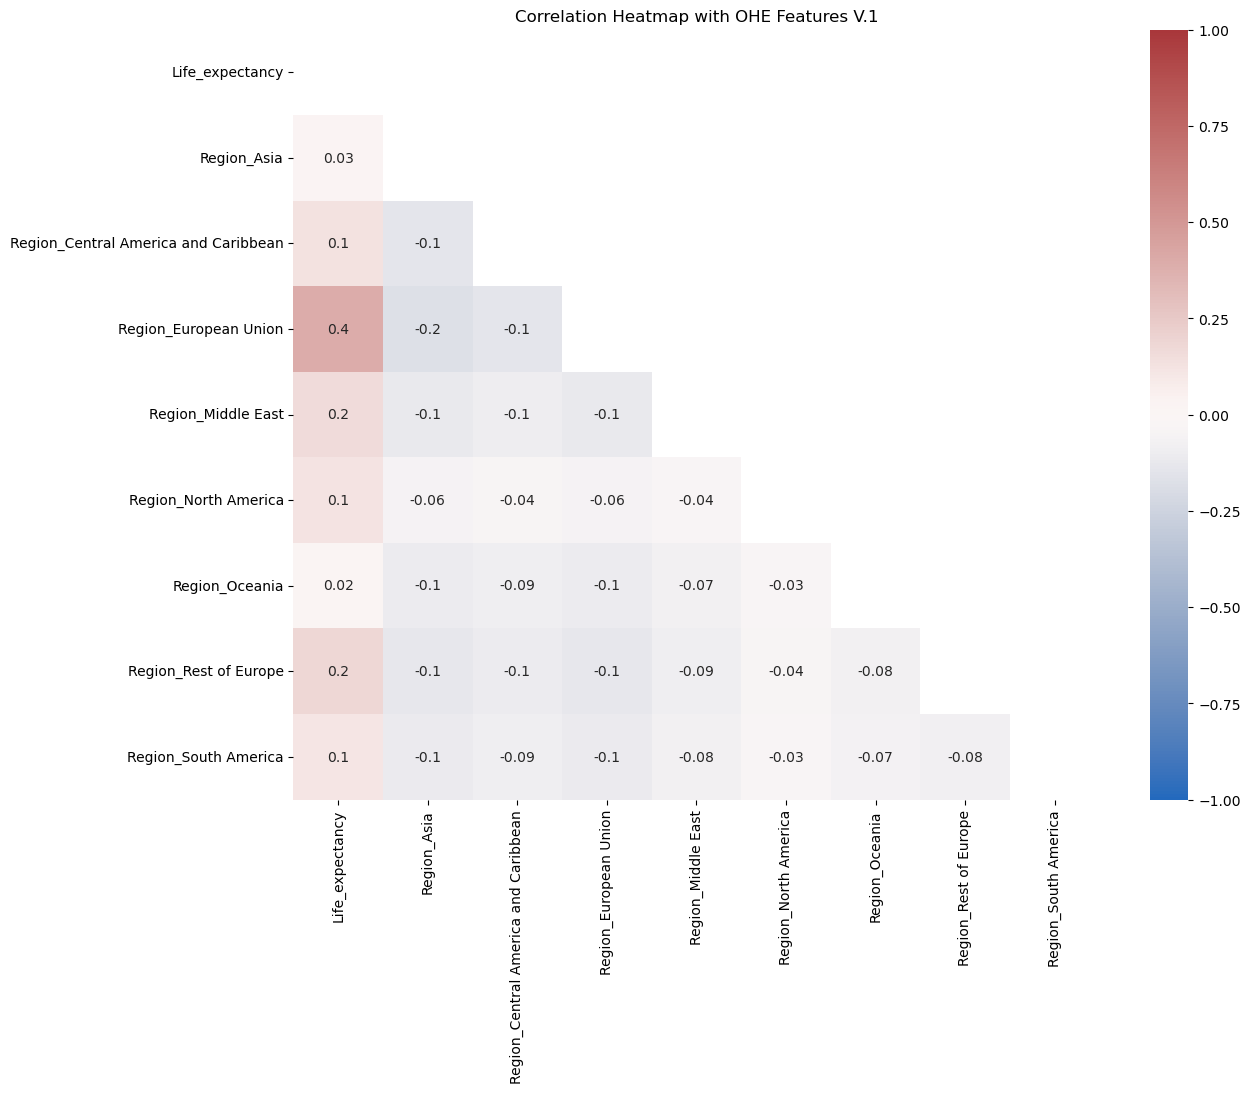

In [237]:
# Correlation Heatmap

plt.figure(figsize=(13,10))  # Setting the figure size

sns.heatmap(df_ohe.corr(numeric_only=True), # passing the correlation matrix with numeric values only
            annot=True,  # to show the correlation value
            vmin=-1, vmax=1, # setting the min and max values in the scale
            fmt='.1', # setting the amount of decimals shown in the correlation value
            cmap='vlag',  # setting the colour map
            mask=np.triu(df_ohe.corr(numeric_only=True))) # creating a mask to show only 1 half of the correlation matrix (instead of having the values mirrored)

plt.title('Correlation Heatmap with OHE Features V.1')

plt.show()

#### 3.3 Outliers

We have seen that the logarithmic transformations of `Schooling`, `GDP_per_capita` and `Incidents_HIV` improve the correlation with `Life_expectancy`.\
Let's visualise their boxplots and compare them with `Schooling_log`, `GDP_per_capita_log` and `Incidents_HIV_log`.

* Comparing the boxplots of `Schooling` and `Schooling_log`, we can observe that the logarithmic transformation has brought to light some outliers that were not visible in the `Schooling` boxplot.\
Additionally we can observe that the transformation has affected the distribution, changing it from normal to left-skewed.

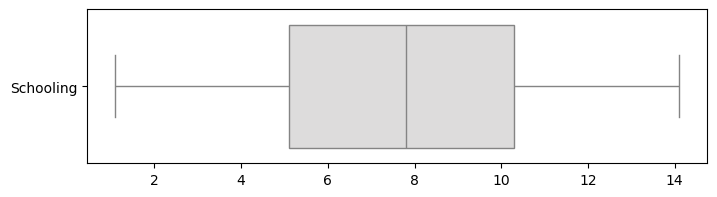

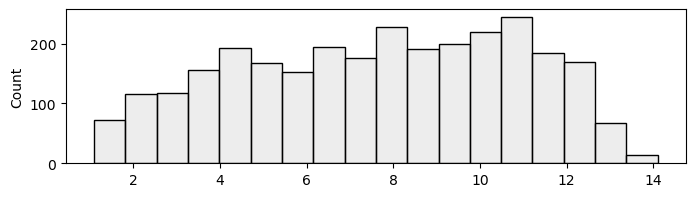

In [241]:
# Horizontal boxplot of 'Schooling'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df[['Schooling']], orient = 'h', palette='coolwarm')
plt.show()

# Histogram of 'Schooling'
plt.figure(figsize = (8, 2))
sns.histplot(data = df[['Schooling']], palette='coolwarm', legend=False)
plt.show()

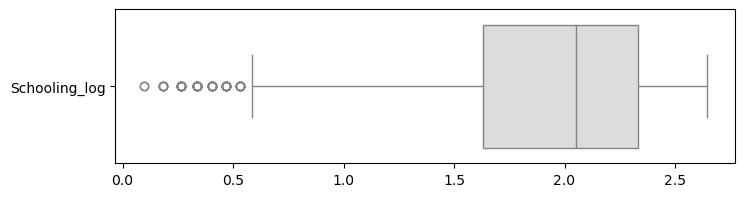

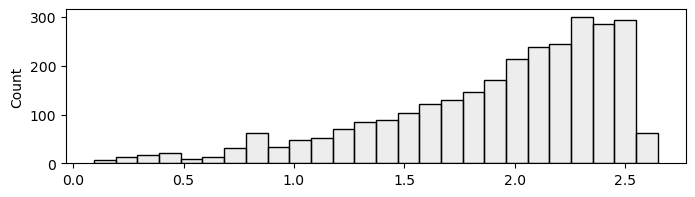

In [242]:
# Horizontal boxplot of 'Schooling_log'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df_test[['Schooling_log']], orient = 'h', palette='coolwarm')
plt.show()

# Histogram of 'Schooling_log'
plt.figure(figsize = (8, 2))
sns.histplot(data = df_test[['Schooling_log']], palette='coolwarm', legend=False)
plt.show()

* Comparing the boxplots of `GDP_per_capita` and `GDP_per_capita_log`, we can observe that the logarithmic transformation is not showing the outliers that were visible in the `GDP_per_capita` boxplot.\
Additionally we can observe that the transformation has affected the distribution, changing it from right-skewed to normal.

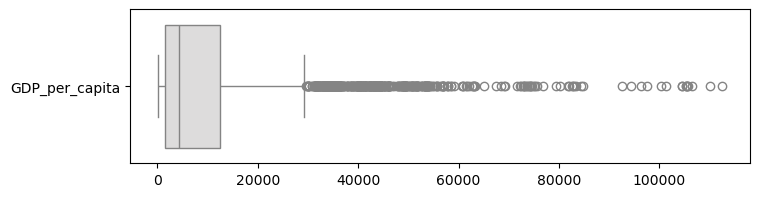

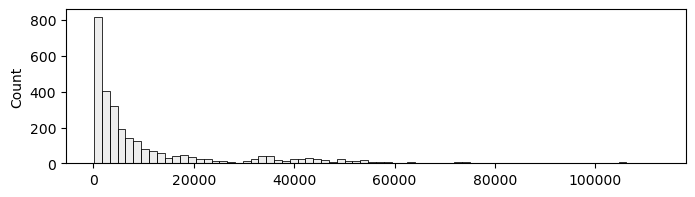

In [244]:
# Horizontal boxplot of 'GDP_per_capita'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df[['GDP_per_capita']], orient = 'h', palette='coolwarm')
plt.show()

# Histogram of 'GDP_per_capita'
plt.figure(figsize = (8, 2))
sns.histplot(data = df[['GDP_per_capita']], palette='coolwarm', legend=False)
plt.show()

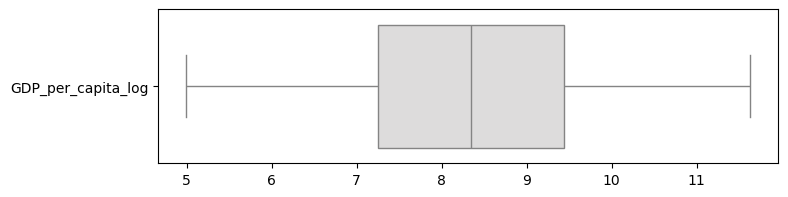

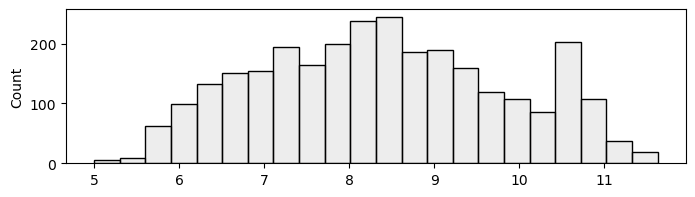

In [245]:
# Horizontal boxplot of 'GDP_per_capita_log'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df_test[['GDP_per_capita_log']], orient = 'h', palette='coolwarm')
plt.show()

# Histogram of 'GDP_per_capita_log'
plt.figure(figsize = (8, 2))
sns.histplot(data = df_test[['GDP_per_capita_log']], palette='coolwarm', legend=False)
plt.show()

* Comparing the boxplots of `Incidents_HIV` and `Incidents_HIV_log`, we can observe that the logarithmic transformation is not showing some of the outliers that were visible in the `Incidents_HIV` boxplot.\
Additionally we can observe that the transformation has affected the distribution, changing it from right-skewed to retalively normal.

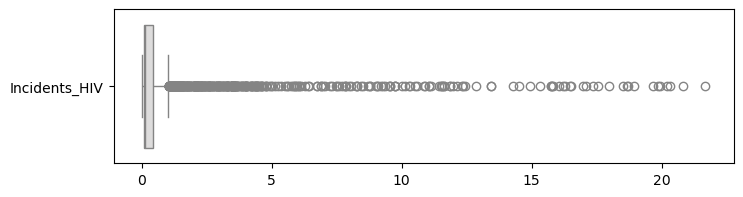

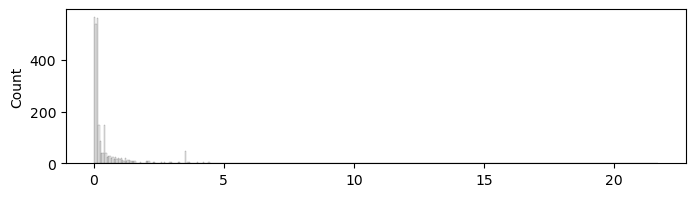

In [247]:
# Horizontal boxplot of 'Incidents_HIV'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df[['Incidents_HIV']], orient = 'h', palette='coolwarm')
plt.show()

# Histogram of 'Incidents_HIV'
plt.figure(figsize = (8, 2))
sns.histplot(data = df[['Incidents_HIV']], palette='coolwarm', legend=False)
plt.show()

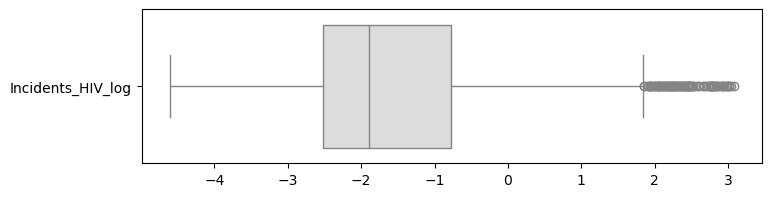

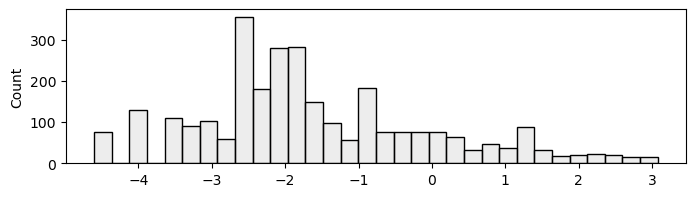

In [248]:
# Horizontal boxplot of 'Incidents_HIV_log'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df_test[['Incidents_HIV_log']], orient = 'h', palette='coolwarm')
plt.show()

# Histogram of 'Incidents_HIV_log'
plt.figure(figsize = (8, 2))
sns.histplot(data = df_test[['Incidents_HIV_log']], palette='coolwarm', legend=False)
plt.show()

Additionally, let's have a look at the distribution of the rest of the features in the dataframe.

* `Life_expectancy` has a left-skewed distribution with low-value outliers.

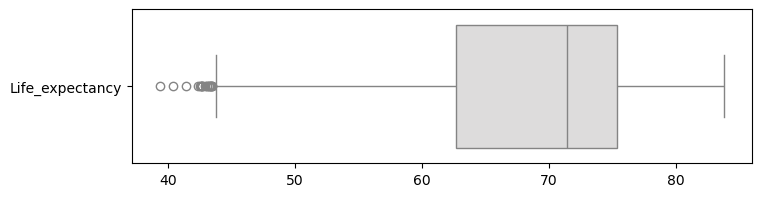

In [251]:
# Horizontal boxplot of 'Life_expectancy'
plt.figure(figsize = (8,2))
sns.boxplot(data = df[['Life_expectancy']], orient = 'h', palette='coolwarm')
plt.show()

* `Infant_deaths`, `Under_five_deaths` and `Adult_mortality` have a right-skewed distribution with high-value outliers.

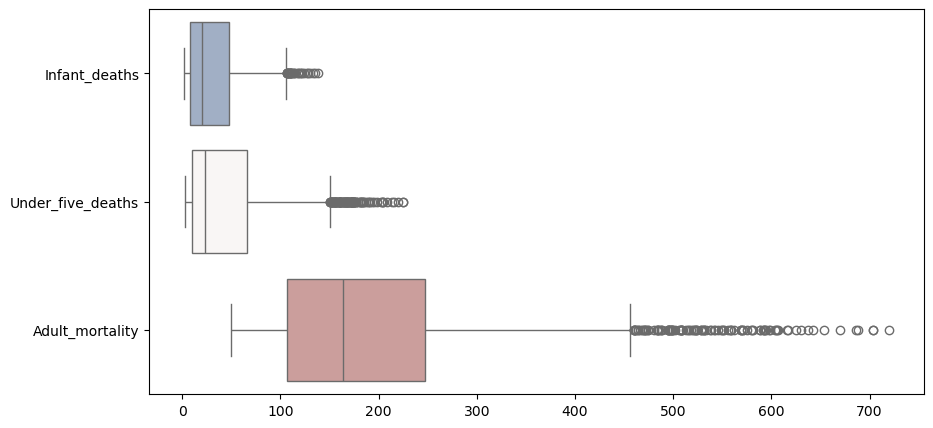

In [253]:
# Horizontal boxplot of Infant_deaths', 'Under_five_deaths' and 'Adult_mortality'
plt.figure(figsize = (10, 5))
sns.boxplot(data = df[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality']], orient = 'h', palette='vlag')
plt.show()

* `Population_mln` has a right-skewed distribution with extreme high-value outliers. We can observe an anomaly in the distribution of outliers, as there is a range between 300 and 1000 where there are no outliers.

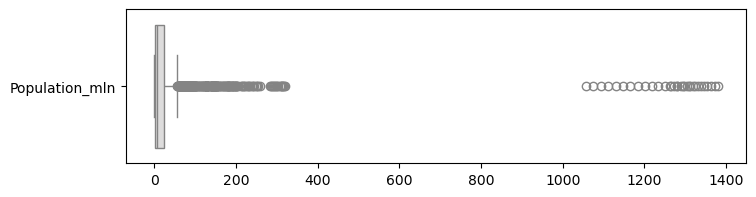

In [255]:
# Horizontal boxplot of 'Population_mln'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df[['Population_mln']], orient = 'h', palette='coolwarm')
plt.show()

* `Alcohol_consumption` has a right-skewed distribution with only a couple of high-value outliers.

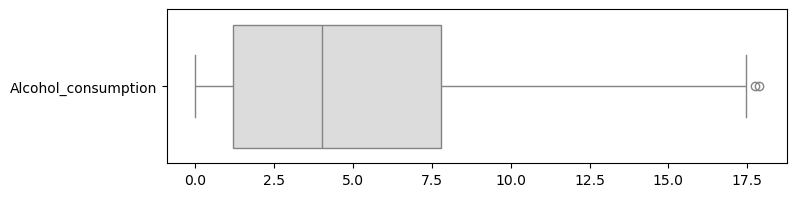

In [257]:
# Horizontal boxplot of 'Alcohol_consumption'
plt.figure(figsize = (8, 2))
sns.boxplot(data = df[['Alcohol_consumption']], orient = 'h', palette='coolwarm')
plt.show()

* `Diphtheria`, `Polio`, `Measles` and `Hepatitis_B` have a left-skewed distribution with low-value outliers.

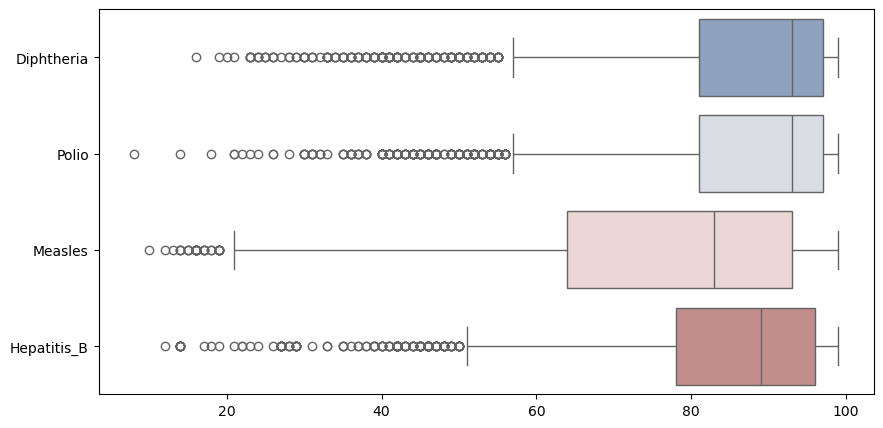

In [259]:
# Horizontal boxplot of 'Diphtheria', 'Polio', 'Measles' and'Hepatitis_B'
plt.figure(figsize = (10, 5))
sns.boxplot(data = df[['Diphtheria', 'Polio', 'Measles', 'Hepatitis_B']], orient = 'h', palette='vlag')
plt.show()

* `BMI`, `Thinness_ten_nineteen_years` and `Thinness_five_nine_years` have a right-skewed distribution with high-value outliers.

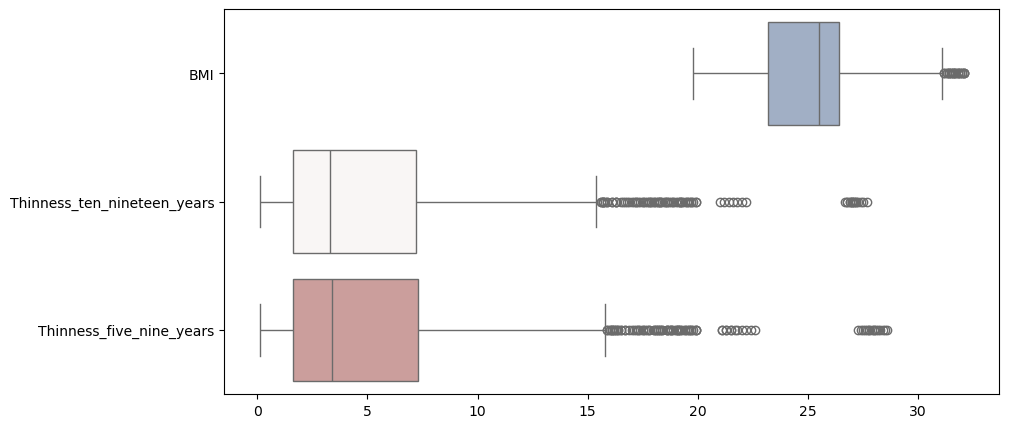

In [261]:
# Horizontal boxplot of 'BMI', 'Thinness_ten_nineteen_years' and'Thinness_five_nine_years'
plt.figure(figsize = (10, 5))
sns.boxplot(data = df[['BMI', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years']], orient = 'h', palette='vlag')
plt.show()

Let's take a broader look at the outliers in the dataframe and examine their proportions across different columns.

**For loop to check numeric datatypes in the DataFrame for outliers (according to boxplot logic)**

* This for loop checks for outliers in each numeric column in the data. Outliers are defined as any value greater than `Q3 + 1.5 x IQR` or less than `Q1 - 1.5 x IQR`.
  - Outliers are found with Matplotlib's boxplot_stats function.
* Since `Economy_Status_Developed` and `Economy_Status_Developing` are numeric columns, they are included in this analysis although they are binary features so outlier logic doesn't apply and these results can be ignored.
* We can see that for the majority of features there is not a large presence of outliers (generally < 5% of records), however `Hepatitis_B`, `Polio`, `Diptheria`, `Incidents_HIV`, `GDP_per_capita` and `Population_mln` are all features with a significant presence of outliers.

In [264]:
# Import required modules
from pandas.api.types import is_numeric_dtype  # to check if a number's datatype is numeric
from matplotlib.cbook import boxplot_stats     # to get boxplot stats from Matplotlib

# For loop to check numeric datatypes in the DataFrame for outliers (according to boxplot logic)
for i in df.columns:  # Iterating through the data's columns
    if is_numeric_dtype(df[i]): # Checking if a column is numeric (integer/float etc.)
        outlier_counts = boxplot_stats(df[i])[0]['fliers'] # Counting the number of outliers in a column using boxplot_stats from Matplotlib
        print(f'# of outliers in {i}:', (outlier_counts).shape[0], f' {round((outlier_counts.shape[0]/len(df) * 100), 2)}% of the records') # Outputs the number and percentage of outliers
    else:
        pass # If a column is not numeric, move on to the next one

# of outliers in Year: 0  0.0% of the records
# of outliers in Infant_deaths: 29  1.01% of the records
# of outliers in Under_five_deaths: 102  3.56% of the records
# of outliers in Adult_mortality: 112  3.91% of the records
# of outliers in Alcohol_consumption: 2  0.07% of the records
# of outliers in Hepatitis_B: 164  5.73% of the records
# of outliers in Measles: 35  1.22% of the records
# of outliers in BMI: 25  0.87% of the records
# of outliers in Polio: 190  6.63% of the records
# of outliers in Diphtheria: 187  6.53% of the records
# of outliers in Incidents_HIV: 461  16.1% of the records
# of outliers in GDP_per_capita: 425  14.84% of the records
# of outliers in Population_mln: 362  12.64% of the records
# of outliers in Thinness_ten_nineteen_years: 89  3.11% of the records
# of outliers in Thinness_five_nine_years: 95  3.32% of the records
# of outliers in Schooling: 0  0.0% of the records
# of outliers in Economy_status_Developed: 592  20.67% of the records
# of outliers in

### 4. Conclusions

Considerations moving forward to the feature engineering / modelling phase:

* Columns with `object` data type such as `Country` and `Region` can be one-hot encoded, as they don't contain ordinal data. However, `Country` has 179 unique values and one-hot encoding would result in 179 new features and would lead to dimensionality issues.

  
* The `Economy_status_Developed` and `Economy_status_Developing` columns have redundant information. We can prescind of one of those columns.

  
* Features positively correlated with `Life_expectancy` are:

  STRONGLY CORRELATED -->>`Schooling` ~ `GDP_per_capita` ~ `Diphtheria` ~ `Polio` ~ `BMI` ~ `Measles` ~ `Hepatitis_B` ~ `Economy_status_Developed` ~ `Alcohol_consumption` ~ `Year` ~ `Population_mln`<<--- WEAKLY CORRELATED


* Features strongly negatively correlated with `Life_expectancy` are:

  STRONGLY CORRELATED --> `Infant_deaths` ~ `Under_five_deaths` ~ `Adult_mortality` ~ `Incidents_HIV` ~ `Thinness_ten_nineteen_years` ~ `Thinness_five_nine_years` ~ `Economy_status_Developing` <<--- WEAKLY CORRELATED

  
* The logarithmic transformation of `Schooling`, `GDP_per_capita` and `Incidents_HIV` improve the correlation with `Life_expectancy`.

  
* The logarithmic transformation of `GDP_per_capita` and `Incidents_HIV` bring benefits in terms of reducing the visibility of outliers and normalising the distribution.

  
* There are a number of outliers present in several columns. One approach to mitigating their impact could be to apply a transformation or, alternatively, remove some of them.


* There are several features that are highly correlated and could potentially be combined when doing feature engineering:
    - `Under_five_deaths`, `Infant_deaths` and `Adult_mortality`
    - `Adult_mortality` and `Incidents_HIV`
    - `Polio`, `Diphtheria` and `Hepatitis_B`
    - `Thinness_five_nine_years` and `Thinness_ten_nineteen_years`

***